## Linear Regression from Scratch

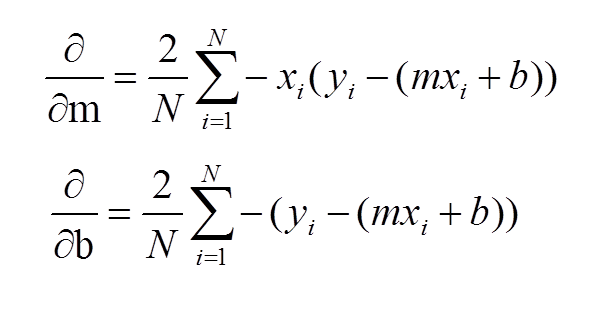



### Understanding the Operations

1. **Prediction Calculation**:
   ```python
   y_pred = np.dot(X, self.weights) + self.bias
   ```
   - **Purpose**: This line computes the predicted values based on the current weights and bias.
   - **Shapes**:
     - \( X \) has a shape of \( (n\_samples, n\_features) \).
     - \( \text{weights} \) has a shape of \( (n\_features,) \) (or 1D array).
     - The dot product \( np.dot(X, \text{weights}) \) results in an array of shape \( (n\_samples,) \), which matches the shape of \( y \) (the true target values).

   In this context, there is no need to transpose \( y_{\text{pred}} \) because it's already in the correct shape (1D array of predictions) after the dot product and doesn't require any further adjustment.

2. **Gradient Calculation**:
   ```python
   dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
   ```
   - **Purpose**: This line computes the gradient of the loss function with respect to the weights, which tells us how much to change the weights to minimize the loss.
   - **Shapes**:
     - \( y_{\text{pred}} - y \) results in a shape of \( (n\_samples,) \). Thus, the gradient of predictions minus the true values also has the same shape.
     - To calculate the gradient, we need to perform the dot product of \( X.T \) (shape \( (n\_features, n\_samples) \)) with \( (y_{\text{pred}} - y) \) (shape \( (n\_samples,) \)).
     - This dot product effectively aggregates the errors across all samples for each feature, effectively giving us the gradient in the shape of \( (n\_features,) \).

### Why Transpose \( X \)?

- **Calculation of \( dw \)**:
  - The transposition of \( X \) allows the operation \( np.dot(X.T, (y_{\text{pred}} - y)) \) to yield the correct number of gradients corresponding to each feature.
  - Without transposing \( X \), you would not be able to correctly compute the gradient because the shapes of the arrays would not align for dot multiplication:
    - \( X \) (shape \( (n\_samples, n\_features) \)) and \( (y_{\text{pred}} - y) \) (shape \( (n\_samples,) \)) need to be aligned to get a gradientnal clarifications, feel free to ask!

In [17]:
import numpy as np  
from sklearn.datasets import make_regression  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_squared_error  

class MyCustomLinearRegression:  
    def __init__(self, n_iters=1000, lr=0.02):  
        self.n_iters = n_iters  
        self.lr = lr  
        self.weights = None  
        self.bias = None  

    def fit(self, X, y):  
        n_samples, n_features = X.shape  
        
        # Initialize the weights  
        self.weights = np.zeros(n_features)  
        self.bias = 0  

        for _ in range(self.n_iters):  
            # Make the prediction  
            y_pred = np.dot(X, self.weights) + self.bias  

            # Gradient calculation  
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))  
            db = (1/n_samples) * np.sum((y_pred - y))  

            # Update the weights  
            self.weights -= self.lr * dw  
            self.bias -= self.lr * db  

    def predict(self, X_test):  
        # Make predictions  
        y_pred = np.dot(X_test, self.weights) + self.bias  
        return y_pred  

# Generate data  
np.random.seed(42)  
X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)  

# Fit the model  
lr = MyCustomLinearRegression()  
lr.fit(X_train, y_train)  

# Predict and calculate RMSE  
y_preds = lr.predict(X_test)  
rmse = np.sqrt(mean_squared_error(y_test, y_preds))  # Corrected this line  
print("Root Mean Squared Error:", rmse)  

Root Mean Squared Error: 10.245578463096606


Intercept (bias): 0.0318503042916222
Slope (weights): 16.76815920706001


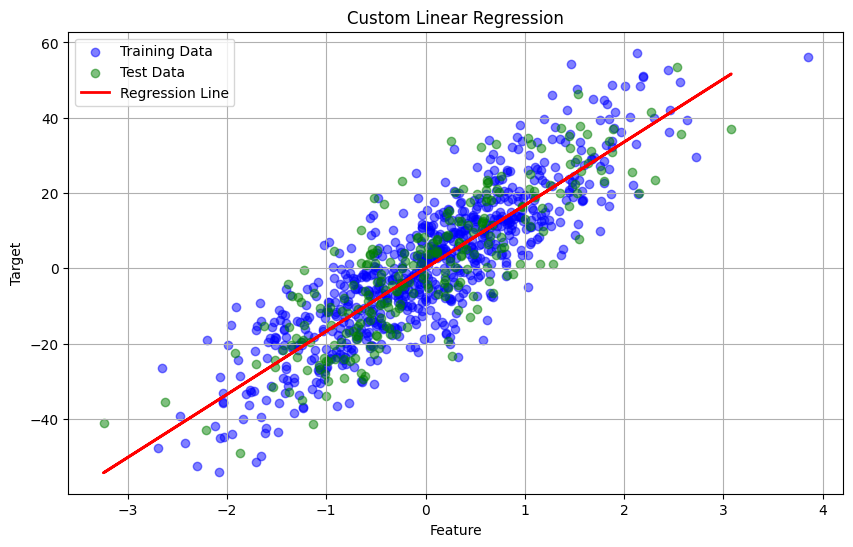

In [19]:
# Print the intercept and slope  
import matplotlib.pyplot as plt 
print("Intercept (bias):", lr.bias)  
print("Slope (weights):", lr.weights[0])  # Since there's only one feature  

# Plotting  
plt.figure(figsize=(10, 6))  
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.5)  
plt.scatter(X_test, y_test, color='green', label='Test Data', alpha=0.5)  
plt.plot(X_test, y_preds, color='red', label='Regression Line', linewidth=2)  
plt.title("Custom Linear Regression")  
plt.xlabel("Feature")  
plt.ylabel("Target")  
plt.legend()  
plt.grid()  
plt.show()  